# Amr Hacoglu - #GRIPAUGUST2024

# 📝 #4 Exploratory Data Analysis - Terrorism

## 📋 Overview

This notebook performs an exploratory data analysis on the 'Global Terrorism' dataset to identify hot zones of terrorism and derive security insights. We'll use Python for this analysis. The following steps will be covered:

1. Importing Libraries
1. Loading and Displaying the Dataset
1. Data Preprocessing
1. Identifying Hot Zones of Terrorism
1. Analyzing Trends in Terrorist Activities
1. In-depth Analysis of Attack Types, Weapons, and Targets
1. Geographical Visualization of Terrorism Impact

Let's start! 🚀

# Import Libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading and Displaying the Dataset

In [168]:
df = pd.read_csv('/kaggle/input/globalterrorismdb/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

In [169]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Displaying Column Information in Range

In [170]:
ranges = [
    (0, 5), (5, 10), (10, 15), (15, 20), (20, 25),
    (25, 30), (30, 35), (35, 40), (40, 45), (45, 50),
    (50, 55), (55, 60), (60, 65), (65, 70), (70, 75),
    (75, 80), (80, 85), (85, 90), (90, 95), (95, 100),
    (100, 105), (105, 110), (110, 115), (115, 120), (120, 125),
    (125, 130), (130, 135)
]

for start, end in ranges:
    print(f"Columns {start} to {end} info:")
    subset = df.iloc[:, start:end]
    subset.info()
    print("\n" + "="*40 + "\n")

Columns 0 to 5 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   eventid     181691 non-null  int64 
 1   iyear       181691 non-null  int64 
 2   imonth      181691 non-null  int64 
 3   iday        181691 non-null  int64 
 4   approxdate  9239 non-null    object
dtypes: int64(4), object(1)
memory usage: 6.9+ MB


Columns 5 to 10 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   extended     181691 non-null  int64 
 1   resolution   2220 non-null    object
 2   country      181691 non-null  int64 
 3   country_txt  181691 non-null  object
 4   region       181691 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.9+ MB


Columns 10 to 15 info:
<class 'pandas.core.frame.Dat

# Data Preprocessing

## Counting Null Values in Column Ranges

In [171]:
ranges = [
    (0, 5), (5, 10), (10, 15), (15, 20), (20, 25),
    (25, 30), (30, 35), (35, 40), (40, 45), (45, 50),
    (50, 55), (55, 60), (60, 65), (65, 70), (70, 75),
    (75, 80), (80, 85), (85, 90), (90, 95), (95, 100),
    (100, 105), (105, 110), (110, 115), (115, 120), (120, 125),
    (125, 130), (130, 135)
]

for start, end in ranges:
    null_counts = df.iloc[:, start:end].isnull().sum()
    print(f"Columns {start} to {end} null counts:")
    print(null_counts)
    print("\n" + "="*40 + "\n")

Columns 0 to 5 null counts:
eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
dtype: int64


Columns 5 to 10 null counts:
extended            0
resolution     179471
country             0
country_txt         0
region              0
dtype: int64


Columns 10 to 15 null counts:
region_txt       0
provstate      421
city           435
latitude      4556
longitude     4557
dtype: int64


Columns 15 to 20 null counts:
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
dtype: int64


Columns 20 to 25 null counts:
crit2                   0
crit3                   0
doubtterr               1
alternative        152680
alternative_txt    152680
dtype: int64


Columns 25 to 30 null counts:
multiple           1
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
dtype: int64


Columns 30 to 35 null counts:
attacktype2        175377
attacktype2_txt    175

## Data Cleaning and Missing Value Imputation

In [172]:
# Date-related
df['approxdate'] = df['approxdate'].fillna('Unknown')

# Location-related
df['provstate'] = df['provstate'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

# Resolution details
df['resolution'] = df['resolution'].fillna('Unknown')

# Event details
df['specificity'] = df['specificity'].fillna(df['specificity'].median())
df['location'] = df['location'].fillna('Unknown')
df['summary'] = df['summary'].fillna('No summary available')

# Alternative and doubtterr
df['doubtterr'] = df['doubtterr'].fillna(0)
df['alternative'] = df['alternative'].fillna(-1)
df['alternative_txt'] = df['alternative_txt'].fillna('Unknown')

# Multiple
df['multiple'] = df['multiple'].fillna(0)

# Attack types
for col in ['attacktype2', 'attacktype3', 'attacktype2_txt', 'attacktype3_txt']:
    df[col] = df[col].fillna('None')

# Target details
df['targsubtype1'] = df['targsubtype1'].fillna(-1)
df['targsubtype1_txt'] = df['targsubtype1_txt'].fillna('Unknown')
df['corp1'] = df['corp1'].fillna('Unknown')
df['target1'] = df['target1'].fillna('Unknown')

# Nationality
for col in ['natlty1', 'natlty2', 'natlty3', 'natlty1_txt', 'natlty2_txt', 'natlty3_txt']:
    df[col] = df[col].fillna('Unknown')

# Additional target details
for col in ['targtype2', 'targtype3', 'targsubtype2', 'targsubtype3', 
            'targtype2_txt', 'targtype3_txt', 'targsubtype2_txt', 'targsubtype3_txt']:
    df[col] = df[col].fillna('None')

df['corp2'] = df['corp2'].fillna('None')
df['corp3'] = df['corp3'].fillna('None')
df['target2'] = df['target2'].fillna('None')
df['target3'] = df['target3'].fillna('None')

# Group names
df['gsubname'] = df['gsubname'].fillna('Unknown')
df['gname2'] = df['gname2'].fillna('None')
df['gsubname2'] = df['gsubname2'].fillna('None')
df['gname3'] = df['gname3'].fillna('None')
df['gsubname3'] = df['gsubname3'].fillna('None')
df['motive'] = df['motive'].fillna('Unknown')

# Group uncertainties
for col in ['guncertain1', 'guncertain2', 'guncertain3']:
    df[col] = df[col].fillna(0)

# Number of perpetrators
df['nperps'] = df['nperps'].fillna(0)
df['nperpcap'] = df['nperpcap'].fillna(0)

# Claims
df['claimed'] = df['claimed'].fillna(0)
df['claimmode'] = df['claimmode'].fillna(-1)
df['claimmode_txt'] = df['claimmode_txt'].fillna('Unknown')
df['claim2'] = df['claim2'].fillna(0)
df['claimmode2'] = df['claimmode2'].fillna(-1)
df['claimmode2_txt'] = df['claimmode2_txt'].fillna('None')
df['claim3'] = df['claim3'].fillna(0)
df['claimmode3'] = df['claimmode3'].fillna(-1)
df['claimmode3_txt'] = df['claimmode3_txt'].fillna('None')
df['compclaim'] = df['compclaim'].fillna(0)

# Weapon details
for col in ['weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3', 'weapsubtype3', 
            'weaptype4', 'weapsubtype4', 'weapsubtype1_txt', 'weaptype2_txt', 
            'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt', 
            'weapsubtype4_txt']:
    df[col] = df[col].fillna('None')

df['weapdetail'] = df['weapdetail'].fillna('Unknown')

# Casualties
for col in ['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']:
    df[col] = df[col].fillna(0)

# Property damage
df['propextent'] = df['propextent'].fillna(-1)
df['propextent_txt'] = df['propextent_txt'].fillna('Unknown')
df['propvalue'] = df['propvalue'].fillna(0)
df['propcomment'] = df['propcomment'].fillna('No comment')

# Hostage/kidnapping
df['ishostkid'] = df['ishostkid'].fillna(0)
for col in ['nhostkid', 'nhostkidus', 'nhours', 'ndays']:
    df[col] = df[col].fillna(0)
df['divert'] = df['divert'].fillna('Unknown')
df['kidhijcountry'] = df['kidhijcountry'].fillna('Unknown')

# Ransom
df['ransom'] = df['ransom'].fillna(0)
for col in ['ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus']:
    df[col] = df[col].fillna(0)
df['ransomnote'] = df['ransomnote'].fillna('No note')

df['hostkidoutcome'] = df['hostkidoutcome'].fillna(-1)
df['hostkidoutcome_txt'] = df['hostkidoutcome_txt'].fillna('Unknown')
df['nreleased'] = df['nreleased'].fillna(0)

# Additional notes and sources
df['addnotes'] = df['addnotes'].fillna('No additional notes')
for col in ['scite1', 'scite2', 'scite3']:
    df[col] = df[col].fillna('No source cited')

# Related incidents
df['related'] = df['related'].fillna('No related incidents')

## Counting Null Values in Column Ranges After Data Cleaning

In [173]:
ranges = [
    (0, 5), (5, 10), (10, 15), (15, 20), (20, 25),
    (25, 30), (30, 35), (35, 40), (40, 45), (45, 50),
    (50, 55), (55, 60), (60, 65), (65, 70), (70, 75),
    (75, 80), (80, 85), (85, 90), (90, 95), (95, 100),
    (100, 105), (105, 110), (110, 115), (115, 120), (120, 125),
    (125, 130), (130, 135)
]

for start, end in ranges:
    null_counts = df.iloc[:, start:end].isnull().sum()
    print(f"Columns {start} to {end} null counts:")
    print(null_counts)
    print("\n" + "="*40 + "\n")

Columns 0 to 5 null counts:
eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
dtype: int64


Columns 5 to 10 null counts:
extended       0
resolution     0
country        0
country_txt    0
region         0
dtype: int64


Columns 10 to 15 null counts:
region_txt    0
provstate     0
city          0
latitude      0
longitude     0
dtype: int64


Columns 15 to 20 null counts:
specificity    0
vicinity       0
location       0
summary        0
crit1          0
dtype: int64


Columns 20 to 25 null counts:
crit2              0
crit3              0
doubtterr          0
alternative        0
alternative_txt    0
dtype: int64


Columns 25 to 30 null counts:
multiple           0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
dtype: int64


Columns 30 to 35 null counts:
attacktype2        0
attacktype2_txt    0
attacktype3        0
attacktype3_txt    0
targtype1          0
dtype: int64


Columns 35 to 40 null counts:
targtype1_txt

In [174]:
df.drop_duplicates(inplace=True)

# Identifying Hot Zones of Terrorism

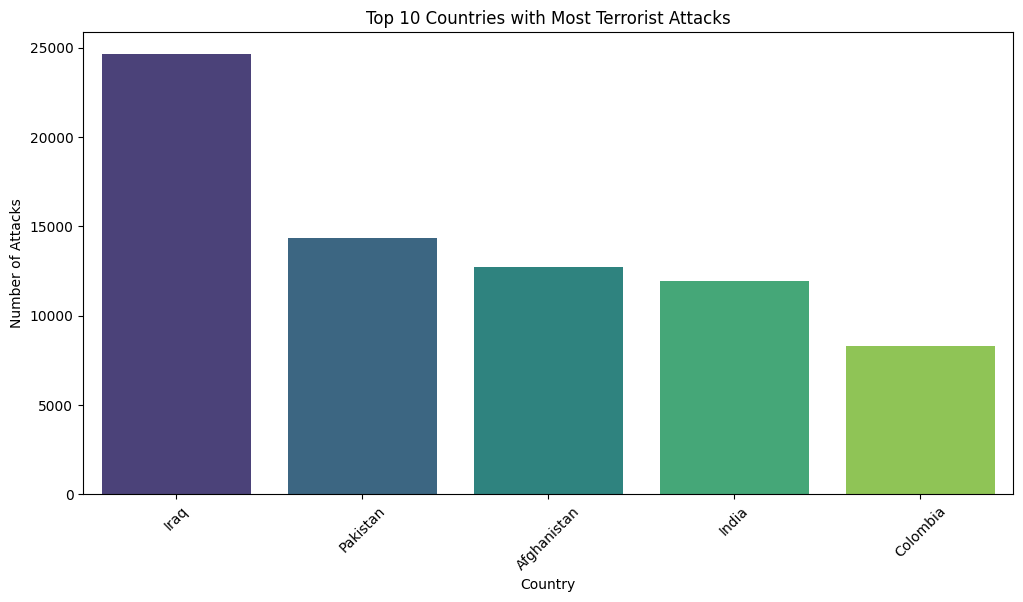

In [175]:
# Count the number of attacks per country
country_attacks = df['country_txt'].value_counts().head(5)

# Plot the top 5 countries with the most terrorist attacks
plt.figure(figsize=(12, 6))
sns.barplot(x=country_attacks.index, y=country_attacks.values, palette='viridis')
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# Analyzing Trends in Terrorist Activities

NaN values in 'iyear': 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



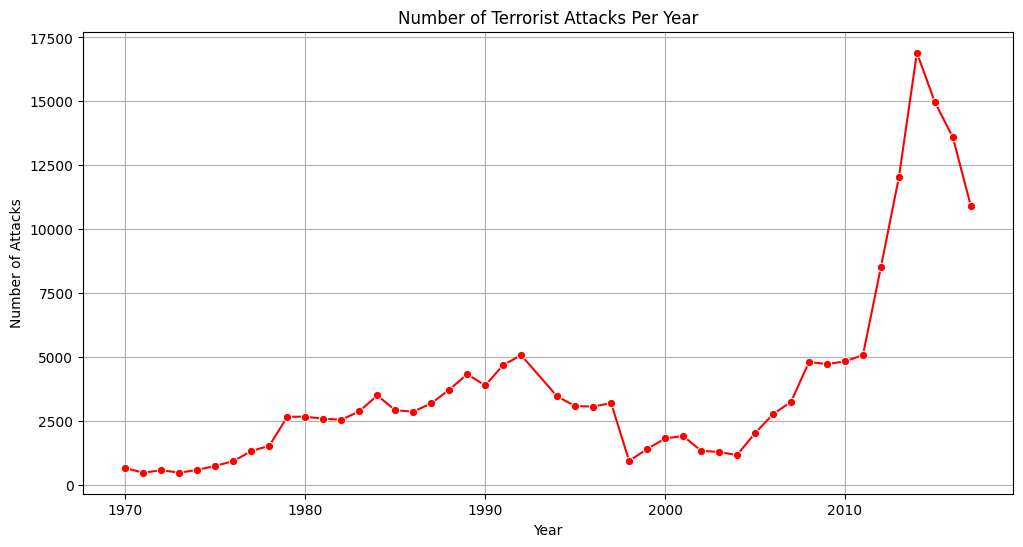

In [176]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for remaining NaN values in 'iyear'
print("NaN values in 'iyear':", df['iyear'].isna().sum())

# Number of attacks per year
attacks_per_year = df['iyear'].value_counts().sort_index()

# Plotting the number of attacks per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o', color='red')
plt.title('Number of Terrorist Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

# In-depth Analysis of Attack Types, Weapons, and Targets

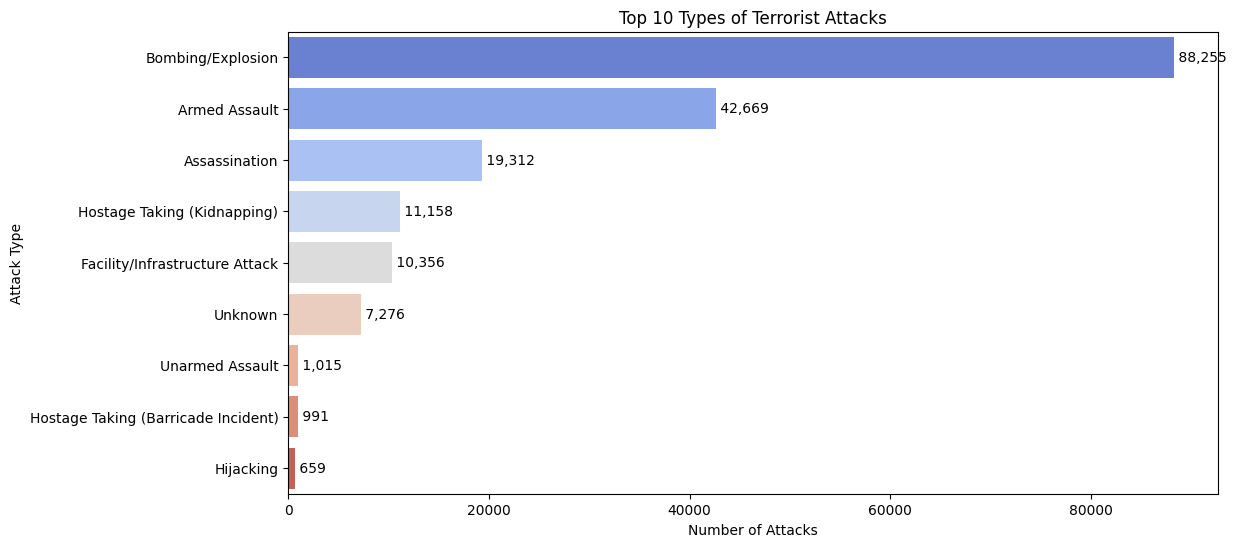

In [177]:
# Analyzing Types of Attacks
attack_types = df['attacktype1_txt'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=attack_types.values, y=attack_types.index, palette='coolwarm')
plt.title('Top 10 Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
for i, v in enumerate(attack_types.values):
    ax.text(v, i, f' {v:,}', va='center')
plt.show()

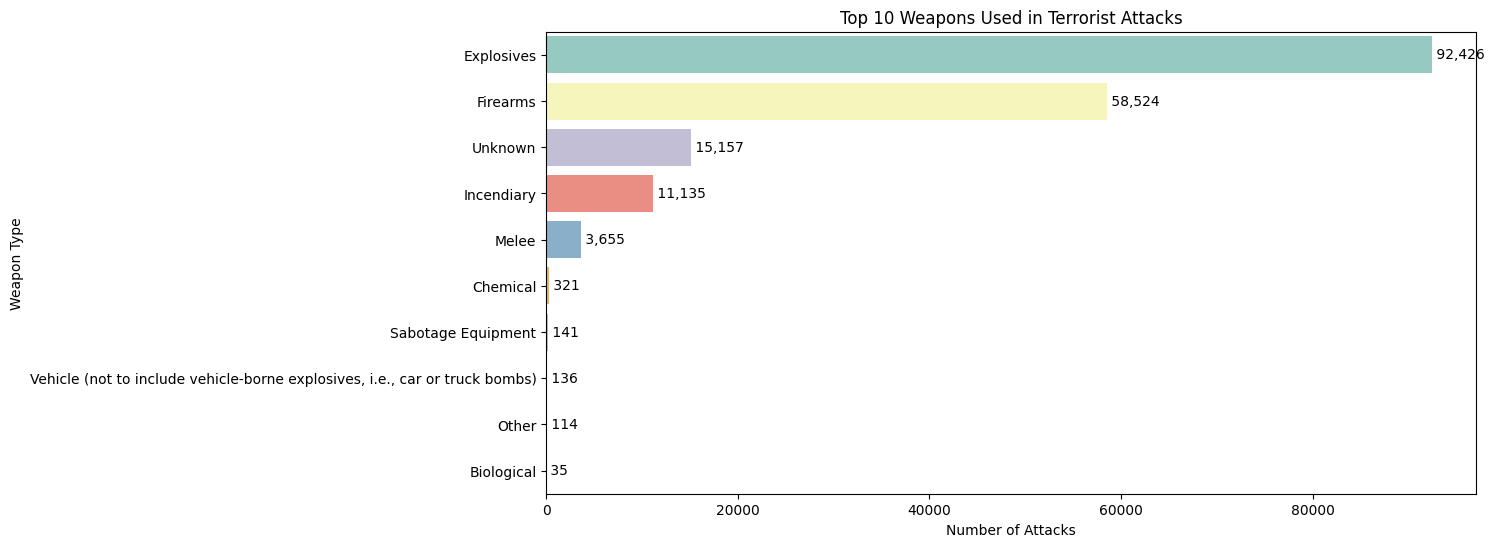

In [178]:
# Analyzing Weapons Used
weapons = df['weaptype1_txt'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=weapons.values, y=weapons.index, palette='Set3')
plt.title('Top 10 Weapons Used in Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
for i, v in enumerate(weapons.values):
    ax.text(v, i, f' {v:,}', va='center')
plt.show()

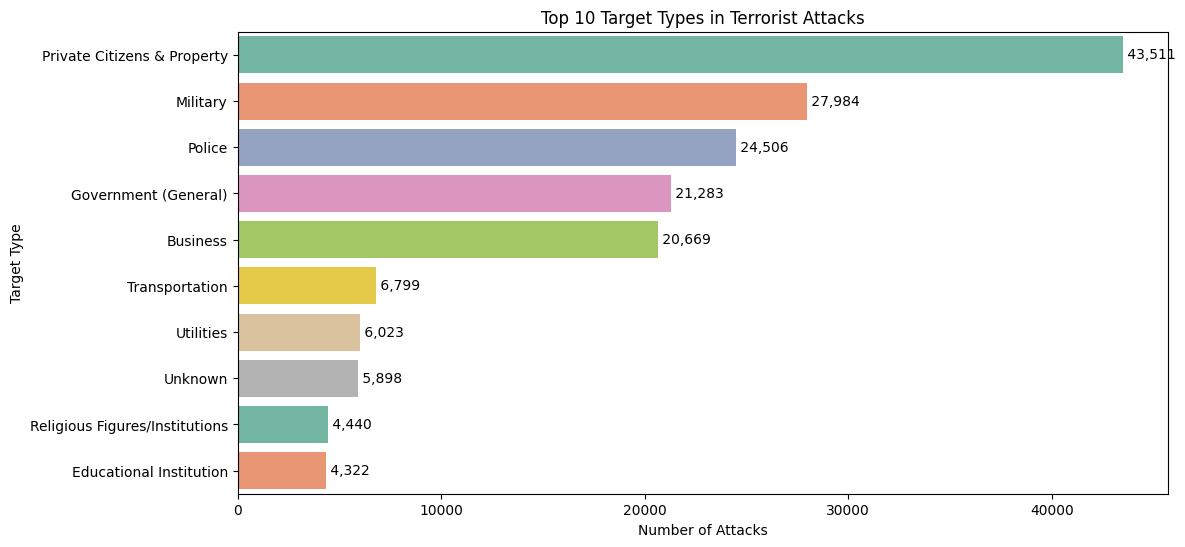

In [179]:
# Analyzing Target Types
targets = df['targtype1_txt'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=targets.values, y=targets.index, palette='Set2')
plt.title('Top 10 Target Types in Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
for i, v in enumerate(targets.values):
    ax.text(v, i, f' {v:,}', va='center')
plt.show()

# Geographical Visualization of Terrorism Impact

In [180]:
df_geo = df.groupby('country_txt')['nkill'].sum().reset_index()
df_geo = df_geo.rename(columns={'nkill': 'Total Kills'})

fig = px.choropleth(df_geo, 
                    locations='country_txt', 
                    locationmode='country names',
                    color='Total Kills',
                    hover_name='country_txt',
                    color_continuous_scale='Viridis',
                    title='Global Terrorism Hot Zones (Total Kills)')
fig.show()